# Cyclistic Dataset 

In [1]:
# Loading the necessary packages 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into a pandas dataframe

df_0 = pd.read_csv(r'D:\Data analyst\Bicycle_analysis\Bicycle_data.csv')
df_0.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.612,member
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.612,41.8957,-87.6201,member
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member


In [3]:
# Finding the different type of memebers and bikes  

print(df_0.rideable_type.unique())
print(df_0.member_casual.unique())

['docked_bike' 'rideable_type' 'electric_bike' 'classic_bike' nan]
['member' 'casual' 'member_casual' nan]


In [4]:
# Checking for the number of null values in each of the columns 
df_0.isnull().sum()

ride_id                     0
rideable_type               1
started_at                  1
ended_at                    1
start_station_name    2098890
start_station_id      2099645
end_station_name      2254060
end_station_id        2254662
start_lat                   1
start_lng                   1
end_lat                 18598
end_lng                 18598
member_casual               1
dtype: int64

In [5]:
# Checking the data type in each column

df_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535725 entries, 0 to 17535724
Data columns (total 13 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   start_lat           object
 9   start_lng           object
 10  end_lat             object
 11  end_lng             object
 12  member_casual       object
dtypes: object(13)
memory usage: 1.7+ GB


In [6]:
# Renaming the columns name for easier understanding

df_0.rename(columns={'rideable_type': 'bike_type', 'member_casual': 'membership_type'}, inplace=True)

df_0.head(10)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.612,member
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.612,41.8957,-87.6201,member
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member


In [7]:
# Checking the garbage rows 

df_0[df_0['bike_type'] == 'rideable_type'].head(100)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type
84776,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
285051,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
628057,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1179538,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1801900,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2334859,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2723513,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2983230,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3114804,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3211639,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [8]:
# droping the grabage rows 

df_0 = df_0.drop(df_0[df_0['membership_type'] == 'member_casual'].index)

In [9]:
# checking how many rows were deleted

df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535686 entries, 0 to 17535724
Data columns (total 13 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   bike_type           object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   start_lat           object
 9   start_lng           object
 10  end_lat             object
 11  end_lng             object
 12  membership_type     object
dtypes: object(13)
memory usage: 1.8+ GB


In [10]:
# finding the median coordinates of each station and using those values for the station -- so that we have a unique coordinate for each station 

median_values = df_0.groupby('start_station_name')[['start_lat', 'start_lng']].transform('median')
df_0['start_lat'] = median_values['start_lat']
df_0['start_lng'] = median_values['start_lng']


median_values = df_0.groupby('end_station_name')[['end_lat', 'end_lng']].transform('median')
df_0['end_lat'] = median_values['end_lat']
df_0['end_lng'] = median_values['end_lng']

In [11]:
# Changing the type of the columns 'started_at' and 'ended_at' type from object to datetime -- for easier handling 

df_0['started_at'] = pd.to_datetime(df_0['started_at'])
df_0['ended_at'] = pd.to_datetime(df_0['ended_at'])

# Creating a column called 'time_duration_minutes' which holds the time duration of the ride in minutes

df_0['time_duration_minutes'] = (df_0['ended_at'] - df_0['started_at']).dt.total_seconds() / 60
df_0.head(10)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type,time_duration_minutes
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896373,-87.660984,41.932225,-87.658617,member,26.816667
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924398,-87.715441,41.930585,-87.723777,member,8.150000
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894503,-87.617854,41.867888,-87.623041,member,14.383333
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903029,-87.697474,41.899181,-87.6722,member,12.200000
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890173,-87.626185,41.969517,-87.654691,casual,52.916667
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.89691,-87.621743,41.892278,-87.612043,member,5.400000
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.892278,-87.612043,41.895748,-87.620104,member,5.216667
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.866501,-87.684697,41.874749,-87.686445,casual,75.816667
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.894877,-87.632326,41.903486,-87.643353,casual,5.733333
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.884603,-87.706305,41.909657,-87.716632,member,17.316667


In [12]:
# drop any duplicates from the dataframe 

df_0.drop_duplicates(inplace = True, keep= 'last')

In [13]:
# Make sure all time is in positive --- some of the time stamps are switched between started_at and ended_at 

df_0['time_duration_minutes'] = df_0['time_duration_minutes'].abs()

# Removing data on trips with 0 minutes rides

df_0 = df_0[df_0['time_duration_minutes'] != 0]


In [14]:
# checking the maximum ride times for each of type of members

result = df_0.groupby('membership_type')['time_duration_minutes'].agg(['max', 'min'])

print(result)


                          max       min
membership_type                        
casual           55944.150000  0.016667
member           58720.033333  0.016667


In [15]:
# Checking the number of rides that are equal or more than 24 hours 

df_day_passes = (
    df_0[['membership_type', 'time_duration_minutes']]
    .groupby('membership_type')
    .filter(lambda x: (x['time_duration_minutes'] >= 1440).any())
    .groupby('membership_type')
    .size()
    .reset_index(name='day_passes')
)

print(df_day_passes)


  membership_type  day_passes
0          casual     7327592
1          member    10206411


In [16]:
# Average ride duration per membership type

average_duration = df_0.groupby('membership_type')['time_duration_minutes'].mean()

print(average_duration)


membership_type
casual    33.359813
member    14.404449
Name: time_duration_minutes, dtype: float64


<Figure size 1440x720 with 0 Axes>

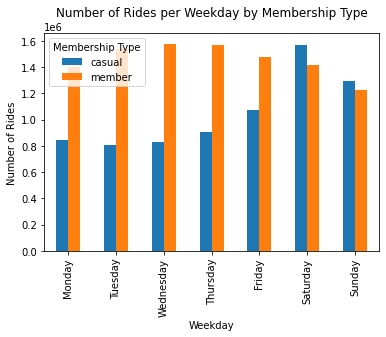

In [47]:
#

df_0['started_at'] = pd.to_datetime(df_0['started_at'])


df_0['weekday'] = df_0['started_at'].dt.weekday


rides_per_weekday = df_0.groupby(['weekday', 'membership_type']).size().unstack(fill_value=0)


plt.figure(figsize=(20, 10))
rides_per_weekday.plot(kind='bar', stacked=False)
plt.title('Number of Rides per Weekday by Membership Type')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Membership Type')
plt.show()

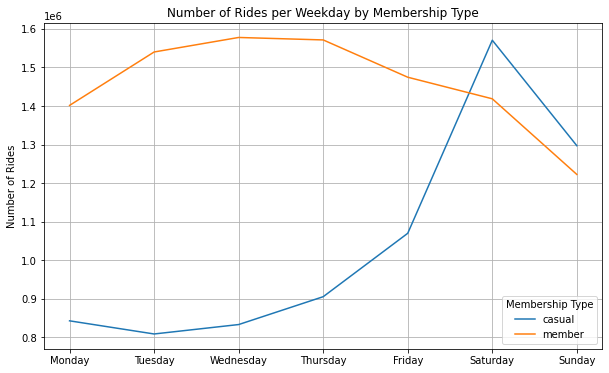

In [18]:
# Checking the number of rides each day 

df_0['started_at'] = pd.to_datetime(df_0['started_at'])

df_0['weekday'] = df_0['started_at'].dt.weekday

rides_per_weekday = df_0.groupby(['weekday', 'membership_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for user_type in rides_per_weekday.columns:
    plt.plot(rides_per_weekday.index, rides_per_weekday[user_type], label=user_type)

plt.title('Number of Rides per Weekday by Membership Type')
plt.ylabel('Number of Rides')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Membership Type')
plt.grid(True)
plt.show()

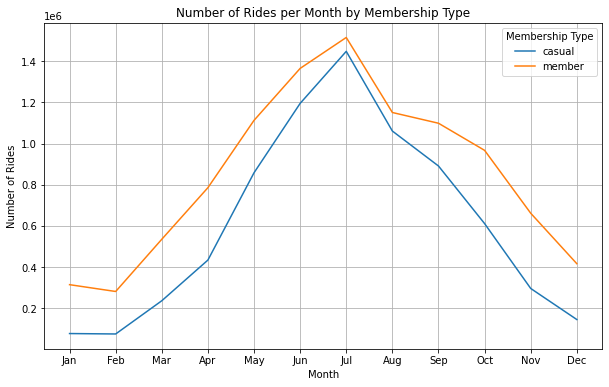

In [19]:
# Checking the ride trends each month 

df_0['started_at'] = pd.to_datetime(df_0['started_at'])

df_0['month'] = df_0['started_at'].dt.month

rides_per_month = df_0.groupby(['month', 'membership_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for user_type in rides_per_month.columns:
    plt.plot(rides_per_month.index, rides_per_month[user_type], label=user_type)

plt.title('Number of Rides per Month by Membership Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Membership Type')
plt.grid(True)
plt.show()

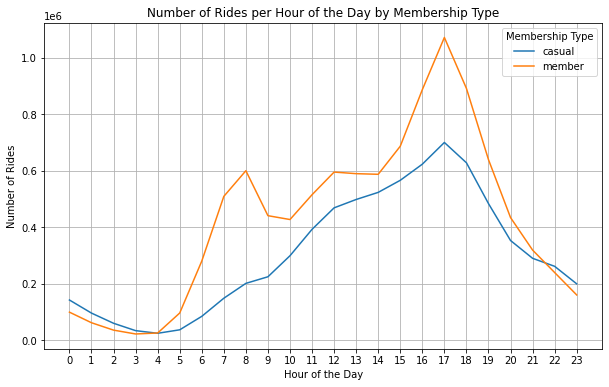

In [20]:
# Checking the trend of the members throughout the day 

df_0['started_at'] = pd.to_datetime(df_0['started_at'])

df_0['hour'] = df_0['started_at'].dt.hour

rides_per_hour = df_0.groupby(['hour', 'membership_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for user_type in rides_per_hour.columns:
    plt.plot(rides_per_hour.index, rides_per_hour[user_type], label=user_type)

plt.title('Number of Rides per Hour of the Day by Membership Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(24))
plt.legend(title='Membership Type')
plt.grid(True)
plt.show()

In [21]:
df_0.groupby(['membership_type', 'start_station_name']).size().unstack().fillna(0)

start_station_name,10101 S Stony Island Ave,111th St - Morgan Park Metra,2112 W Peterson Ave,351,410,532 E 43rd St,63rd & Western Ave - north corner,63rd & Western Ave - south corner,63rd St Beach,83rd St (Avalon Park) Metra,...,Woodlawn & 103rd - Olive Harvey Vaccination Site,Woodlawn Ave & 55th St,Woodlawn Ave & 75th St,Woodlawn Ave & Lake Park Ave,Yale Ave & 119th St,Yates Blvd & 75th St,Yates Blvd & 93rd St,Yates Blvd & Exchange Ave,Zapata Academy,hubbard_test_lws
membership_type,,,,,,,,,,,,,,,,,,,,,
casual,3.0,7.0,1294.0,2.0,2.0,17.0,14.0,6.0,3858.0,2.0,...,108.0,8539.0,201.0,2704.0,2.0,640.0,167.0,9.0,3.0,3.0
member,0.0,7.0,2001.0,0.0,5.0,17.0,0.0,5.0,2023.0,0.0,...,52.0,17519.0,99.0,3174.0,0.0,314.0,111.0,6.0,0.0,0.0


In [22]:
df_0.groupby(['membership_type', 'start_station_name']).head(30)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type,time_duration_minutes,weekday,month,hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896373,-87.660984,41.932225,-87.658617,member,26.816667,6.0,4.0,17.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924398,-87.715441,41.930585,-87.723777,member,8.150000,4.0,4.0,17.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894503,-87.617854,41.867888,-87.623041,member,14.383333,2.0,4.0,17.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903029,-87.697474,41.899181,-87.6722,member,12.200000,1.0,4.0,12.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890173,-87.626185,41.969517,-87.654691,casual,52.916667,5.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527658,A4CC85FC482568D9,electric_bike,2023-07-23 17:07:46,2023-07-23 17:15:27,Public Rack - Springfield Ave & Lawrence Ave,1131.0,NaN,NaN,41.968354,-87.725638,NaN,NaN,casual,7.683333,6.0,7.0,17.0
17528254,3F985E6EE83EB4BE,electric_bike,2023-07-09 08:30:41,2023-07-09 08:40:04,Public Rack - Nashotah & Northwest Hwy,1195.0,NaN,NaN,41.98812,-87.79129,NaN,NaN,casual,9.383333,6.0,7.0,8.0
17528568,473F1BE63EF8EE35,electric_bike,2023-07-05 20:47:34,2023-07-05 20:47:51,Public Rack - Nashotah & Northwest Hwy,1195.0,Public Rack - Nashotah & Northwest Hwy,1195.0,41.98812,-87.79129,41.988141,-87.791447,casual,0.283333,2.0,7.0,20.0
17528569,C02B5E8569B4BB5D,electric_bike,2023-07-05 20:48:54,2023-07-05 21:13:33,Public Rack - Nashotah & Northwest Hwy,1195.0,Public Rack - Nashotah & Northwest Hwy,1195.0,41.98812,-87.79129,41.988141,-87.791447,casual,24.650000,2.0,7.0,20.0


In [23]:

station_counts = df_0.groupby(['membership_type', 'start_station_name']).size().reset_index(name='count')



print(station_counts)


     membership_type            start_station_name  count
0             casual      10101 S Stony Island Ave      3
1             casual  111th St - Morgan Park Metra      7
2             casual           2112 W Peterson Ave   1294
3             casual                           351      2
4             casual                           410      2
...              ...                           ...    ...
3675          member        Woodlawn Ave & 75th St     99
3676          member  Woodlawn Ave & Lake Park Ave   3174
3677          member          Yates Blvd & 75th St    314
3678          member          Yates Blvd & 93rd St    111
3679          member     Yates Blvd & Exchange Ave      6

[3680 rows x 3 columns]


In [24]:
# Finding the top 10 start stations for each membership group 

top_10_start_stations_casual = station_counts[station_counts['membership_type']=='casual'].sort_values(by='count', ascending=False).head(10)
top_10_start_stations_member = station_counts[station_counts['membership_type']=='member'].sort_values(by='count', ascending=False).head(10)



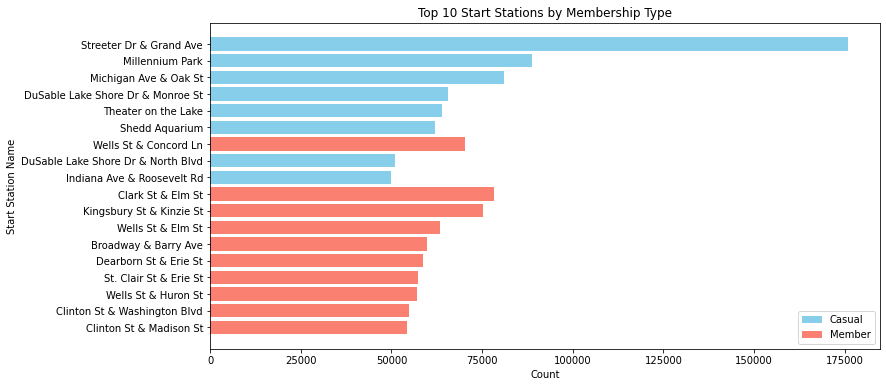

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.barh(top_10_start_stations_casual['start_station_name'], top_10_start_stations_casual['count'], color='skyblue', label='Casual')
ax.barh(top_10_start_stations_member['start_station_name'], top_10_start_stations_member['count'], color='salmon', label='Member')

ax.set_xlabel('Count')
ax.set_ylabel('Start Station Name')
ax.set_title('Top 10 Start Stations by Membership Type')
ax.invert_yaxis()  


ax.legend()


plt.show()

In [26]:
# Finding the top 10 end stations for each membership group 

station_counts_end = df_0.groupby(['membership_type', 'end_station_name']).size().reset_index(name='count')


top_10_end_stations_casual = station_counts_end[station_counts_end['membership_type']=='casual'].sort_values(by='count', ascending=False).head(10)
top_10_end_stations_member = station_counts_end[station_counts_end['membership_type']=='member'].sort_values(by='count', ascending=False).head(10)


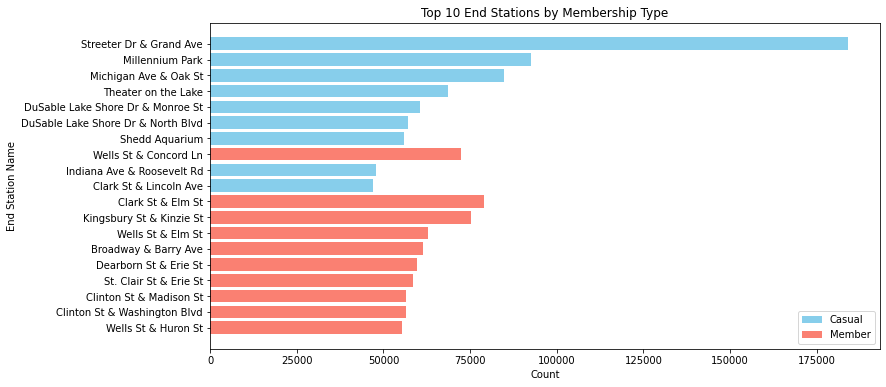

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.barh(top_10_end_stations_casual['end_station_name'], top_10_end_stations_casual['count'], color='skyblue', label='Casual')
ax.barh(top_10_end_stations_member['end_station_name'], top_10_end_stations_member['count'], color='salmon', label='Member')

ax.set_xlabel('Count')
ax.set_ylabel('End Station Name')
ax.set_title('Top 10 End Stations by Membership Type')
ax.invert_yaxis()  


ax.legend()


plt.show()

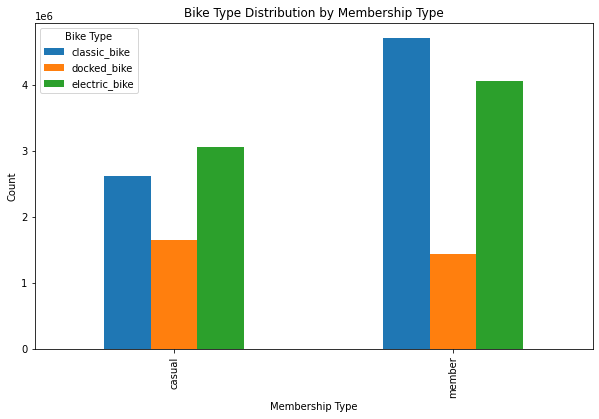

In [28]:
# Checking which boke is used the most by each membership group 

bike_type_counts = df_0.groupby(['membership_type', 'bike_type']).size().unstack(fill_value=0)

bike_type_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.title('Bike Type Distribution by Membership Type')

plt.legend(title='Bike Type')

plt.show()

In [ ]:
from geopy.distance import geodesic

df_0['distance_km'] = df_0.apply(lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).km, axis=1)


In [ ]:
df_0.head(20)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type,time_duration_minutes,weekday,month,hour,distance_km
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896373,-87.660984,41.932225,-87.658617,member,26.816667,6.0,4.0,17.0,3.986937
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924398,-87.715441,41.930585,-87.723777,member,8.150000,4.0,4.0,17.0,0.974893
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894503,-87.617854,41.867888,-87.623041,member,14.383333,2.0,4.0,17.0,2.987343
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903029,-87.697474,41.899181,-87.6722,member,12.200000,1.0,4.0,12.0,2.140318
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890173,-87.626185,41.969517,-87.654691,casual,52.916667,5.0,4.0,10.0,9.124534
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.89691,-87.621743,41.892278,-87.612043,member,5.400000,3.0,4.0,17.0,0.955343
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.892278,-87.612043,41.895748,-87.620104,member,5.216667,3.0,4.0,14.0,0.772051
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.866501,-87.684697,41.874749,-87.686445,casual,75.816667,1.0,4.0,12.0,0.927468
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.894877,-87.632326,41.903486,-87.643353,casual,5.733333,2.0,4.0,10.0,1.323527
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.884603,-87.706305,41.909657,-87.716632,member,17.316667,5.0,4.0,15.0,2.911711


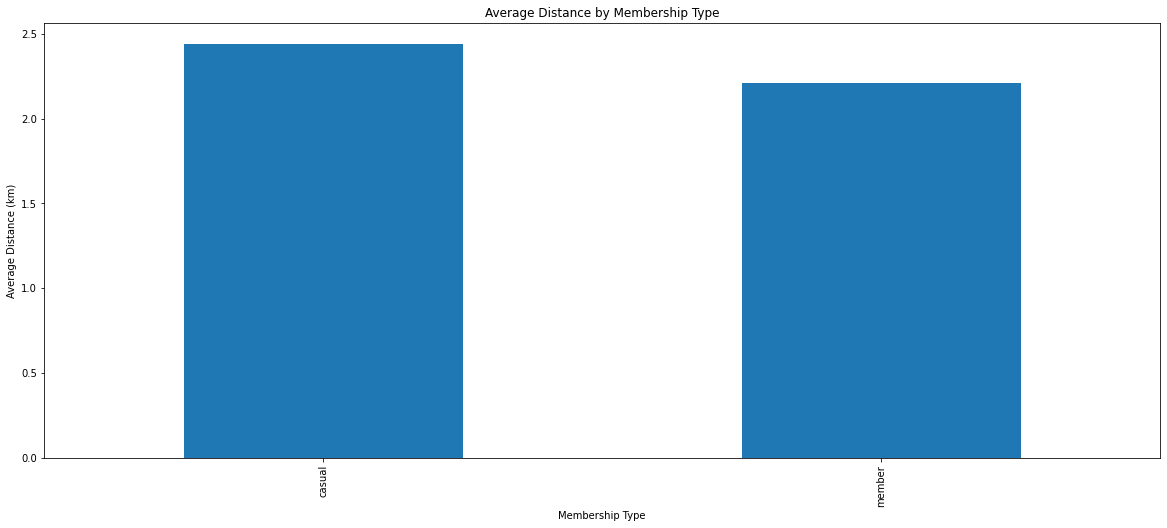

In [ ]:
# Calculating the average distance covered by each membership group 

result = df_0[df_0['distance_km'] != 0].groupby('membership_type')['distance_km'].mean()
plt.figure(figsize=(20, 8))
result.plot(kind='bar')


plt.xlabel('Membership Type')
plt.ylabel('Average Distance (km)')
plt.title('Average Distance by Membership Type')


plt.show()

# Conclusion and insights:

1.  Maximum and Minimum rides for members and casual riders is comparable.
2.  On average, casual riders go for longer duration rides.
3.  Number of rides peak at 5pm for both casual and member riders.
4.  There is also a small peak at 8 am for member riders, at the start of the working day
5.  There is a peak in the number of rides for both the casual and member riders in the summer months, with a peak in july.
6.  Both membership types use classic and electric bikes the most, with the classic being the most used.
7.  On average casual riders cover longer distances than member riders.
